In [1]:
# import sys
# sys.path.append('ADD PATH HERE')


In [2]:
import collections
from io import BytesIO

import PIL
import torchvision
from IPython.core.display import display
from PIL.Image import Image
from matplotlib.pyplot import imshow, figure

from experiments.data.custom.custom_coco import CustomCoco

In [3]:
%matplotlib inline

In [4]:
COCO_PATH = '/Users/nils/Studium/master-thesis/repo/tmp/cutsom-coco-data'
ZEBRA_JSON = '/Users/nils/Studium/master-thesis/repo/experiments/data/custom/id_groups/coco-zebra-ids.json'
INDOOR_JSON = '/Users/nils/Studium/master-thesis/repo/experiments/data/custom/id_groups/coco-indoor-ids.json'
OUTDOOR_JSON = '/Users/nils/Studium/master-thesis/repo/experiments/data/custom/id_groups/coco-outdoor-ids.json'
FOOD_JSON = '/Users/nils/Studium/master-thesis/repo/experiments/data/custom/id_groups/coco-food-ids.json'
IMG_ROOT_PATH = '/Users/nils/Studium/master-thesis/repo/tmp/imgnet'

In [5]:
imagenet_data = torchvision.datasets.ImageNet(IMG_ROOT_PATH, split='val')
img_classes = imagenet_data.classes



In [6]:
def print_devider():
    print('#######################################')
    print('#######################################')

def analyse_data(data):
    print('Number of elements: {}'.format(len(data)))
    print_devider()

    print('Included Categories')
    print('count \t imgnet_id \t imgnet_category')
    categories = {}
    for elem in data:
        _, cls = elem
        if cls in categories:
            categories[cls] += 1
        else:
            categories[cls] = 1

    sorted_categories = {k: v for k, v in sorted(categories.items(), key=lambda item: item[1], reverse=True)}
    for cat in sorted_categories:
        count = categories[cat]
        print('{} \t {} \t\t {}'.format(count, cat, img_classes[cat]))

    print_devider()
    print('Sample Images')
    for i in range(10):
        img, cls = data[i]
        print('{}: {}'.format(cls, img_classes[cls]))
        figure()
        imshow(img)

Number of elements: 5004
#######################################
#######################################
Included Categories
count 	 imgnet_id 	 imgnet_category
1502 	 340 		 ('zebra',)
530 	 883 		 ('vase',)
526 	 920 		 ('traffic light', 'traffic signal', 'stoplight')
459 	 850 		 ('teddy', 'teddy bear')
411 	 963 		 ('pizza', 'pizza pie')
317 	 937 		 ('broccoli',)
304 	 954 		 ('banana',)
154 	 950 		 ('orange',)
131 	 760 		 ('refrigerator', 'icebox')
130 	 21 		 ('kite',)
111 	 879 		 ('umbrella',)
111 	 934 		 ('hotdog', 'hot dog', 'red hot')
103 	 704 		 ('parking meter',)
62 	 651 		 ('microwave', 'microwave oven')
60 	 761 		 ('remote control', 'remote')
34 	 620 		 ('laptop', 'laptop computer')
21 	 532 		 ('dining table', 'board')
16 	 968 		 ('cup',)
9 	 859 		 ('toaster',)
7 	 673 		 ('mouse', 'computer mouse')
4 	 589 		 ('hand blower', 'blow dryer', 'blow drier', 'hair dryer', 'hair drier')
2 	 414 		 ('backpack', 'back pack', 'knapsack', 'packsack', 'rucksack', 'havers

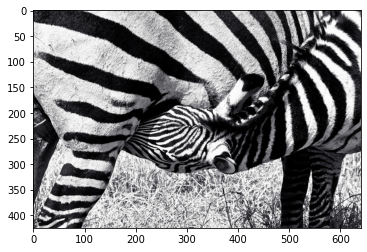

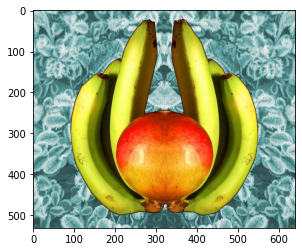

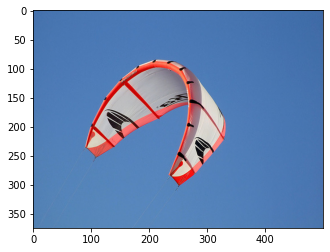

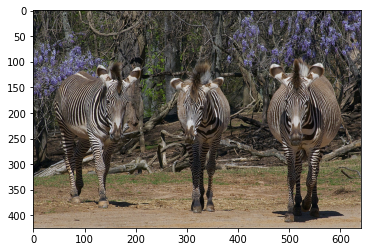

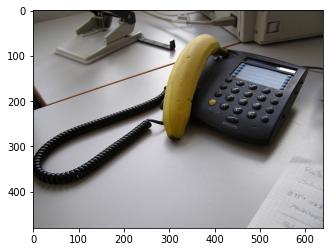

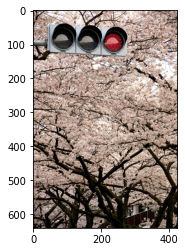

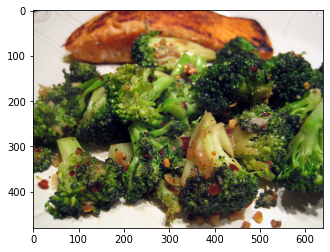

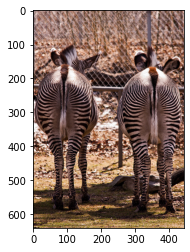

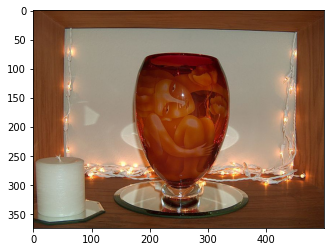

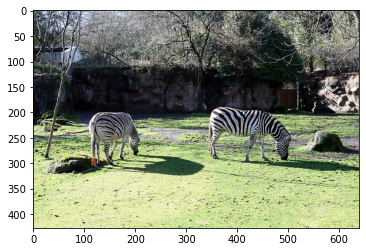

In [7]:
coco_data = CustomCoco(COCO_PATH)
analyse_data(coco_data)

Number of elements: 1502
#######################################
#######################################
Included Categories
count 	 imgnet_id 	 imgnet_category
1502 	 340 		 ('zebra',)
#######################################
#######################################
Sample Images
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)
340: ('zebra',)


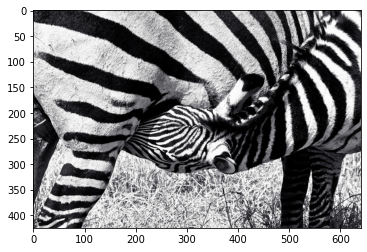

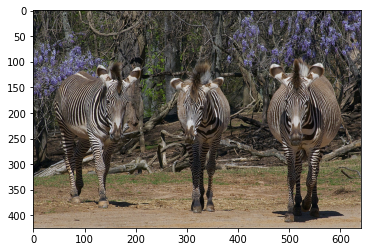

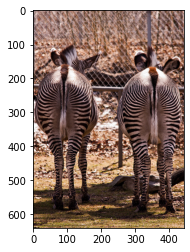

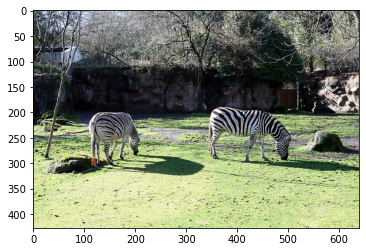

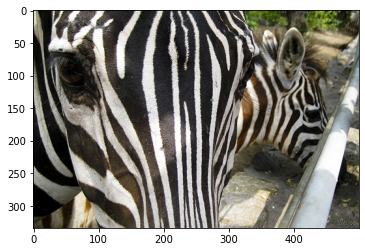

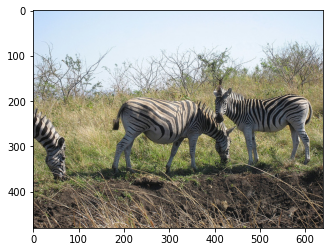

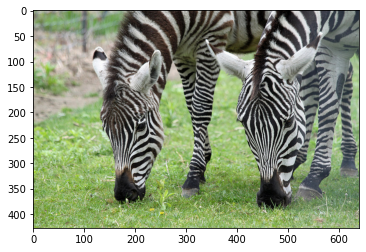

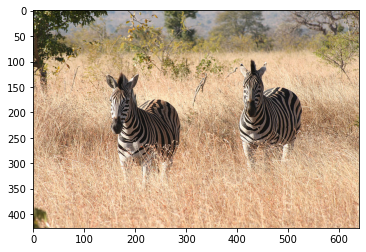

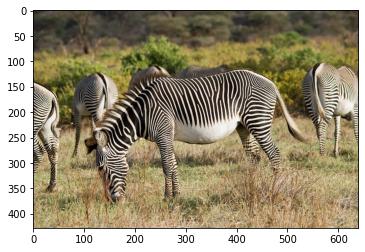

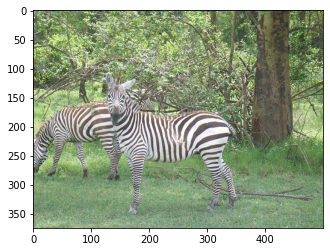

In [8]:
coco_zebra = CustomCoco(COCO_PATH, id_subset_json=ZEBRA_JSON)
analyse_data(coco_zebra)


Number of elements: 1333
#######################################
#######################################
Included Categories
count 	 imgnet_id 	 imgnet_category
530 	 883 		 ('vase',)
459 	 850 		 ('teddy', 'teddy bear')
131 	 760 		 ('refrigerator', 'icebox')
62 	 651 		 ('microwave', 'microwave oven')
60 	 761 		 ('remote control', 'remote')
34 	 620 		 ('laptop', 'laptop computer')
21 	 532 		 ('dining table', 'board')
16 	 968 		 ('cup',)
9 	 859 		 ('toaster',)
7 	 673 		 ('mouse', 'computer mouse')
4 	 589 		 ('hand blower', 'blow dryer', 'blow drier', 'hair dryer', 'hair drier')
#######################################
#######################################
Sample Images
883: ('vase',)
883: ('vase',)
850: ('teddy', 'teddy bear')
850: ('teddy', 'teddy bear')
883: ('vase',)
850: ('teddy', 'teddy bear')
620: ('laptop', 'laptop computer')
850: ('teddy', 'teddy bear')
850: ('teddy', 'teddy bear')
883: ('vase',)


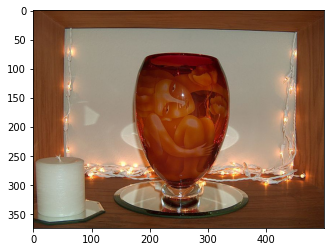

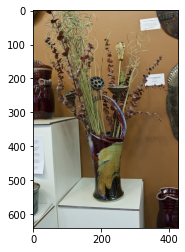

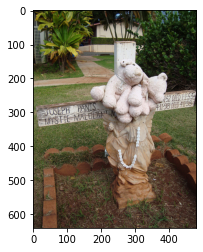

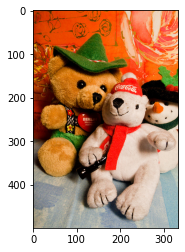

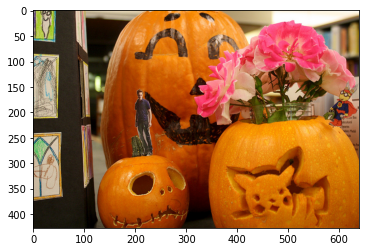

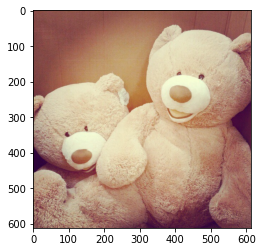

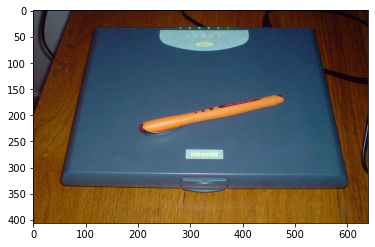

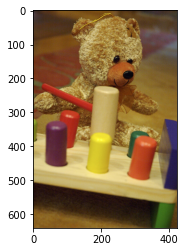

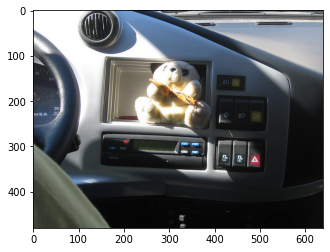

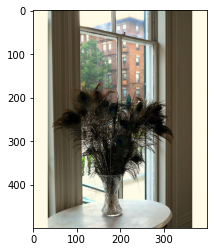

In [9]:
coco_indoor = CustomCoco(COCO_PATH, id_subset_json=INDOOR_JSON)
analyse_data(coco_indoor)

Number of elements: 872
#######################################
#######################################
Included Categories
count 	 imgnet_id 	 imgnet_category
526 	 920 		 ('traffic light', 'traffic signal', 'stoplight')
130 	 21 		 ('kite',)
111 	 879 		 ('umbrella',)
103 	 704 		 ('parking meter',)
2 	 414 		 ('backpack', 'back pack', 'knapsack', 'packsack', 'rucksack', 'haversack')
#######################################
#######################################
Sample Images
21: ('kite',)
920: ('traffic light', 'traffic signal', 'stoplight')
21: ('kite',)
704: ('parking meter',)
704: ('parking meter',)
704: ('parking meter',)
704: ('parking meter',)
21: ('kite',)
21: ('kite',)
920: ('traffic light', 'traffic signal', 'stoplight')


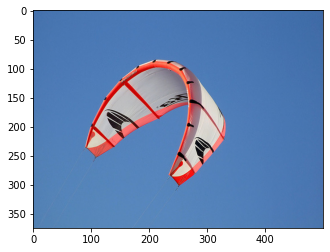

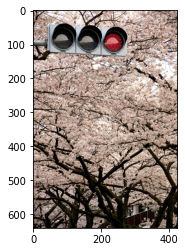

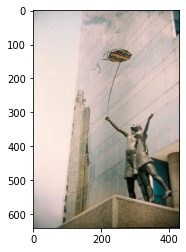

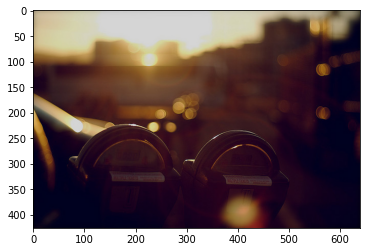

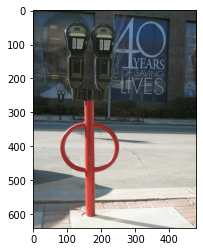

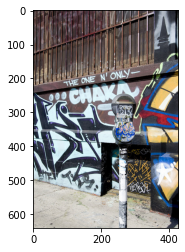

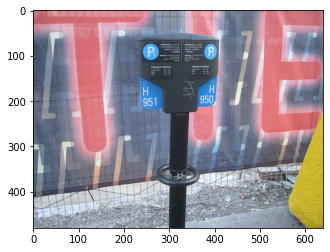

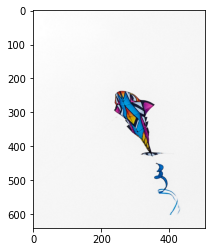

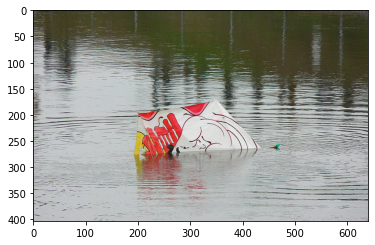

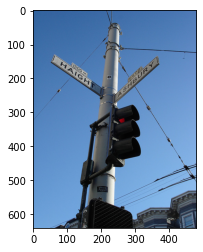

In [10]:
coco_outdoor = CustomCoco(COCO_PATH, id_subset_json=OUTDOOR_JSON)
analyse_data(coco_outdoor)

Number of elements: 1297
#######################################
#######################################
Included Categories
count 	 imgnet_id 	 imgnet_category
411 	 963 		 ('pizza', 'pizza pie')
317 	 937 		 ('broccoli',)
304 	 954 		 ('banana',)
154 	 950 		 ('orange',)
111 	 934 		 ('hotdog', 'hot dog', 'red hot')
#######################################
#######################################
Sample Images
954: ('banana',)
954: ('banana',)
937: ('broccoli',)
963: ('pizza', 'pizza pie')
954: ('banana',)
937: ('broccoli',)
937: ('broccoli',)
963: ('pizza', 'pizza pie')
954: ('banana',)
937: ('broccoli',)


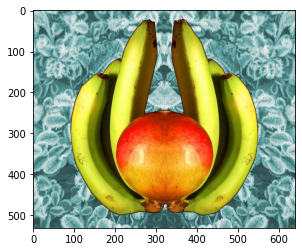

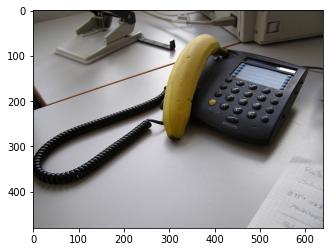

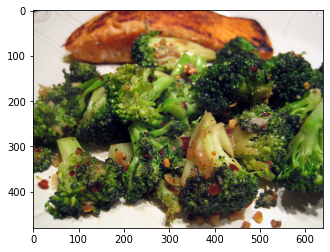

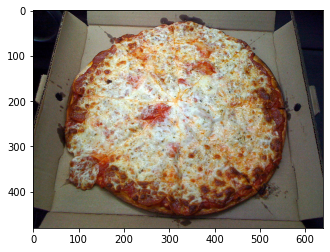

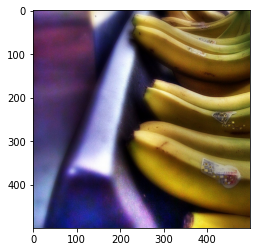

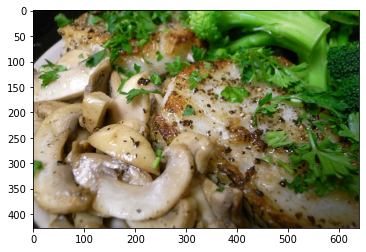

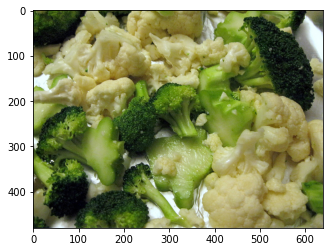

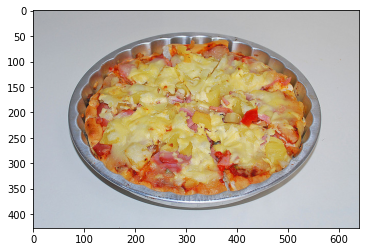

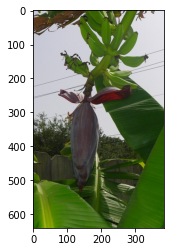

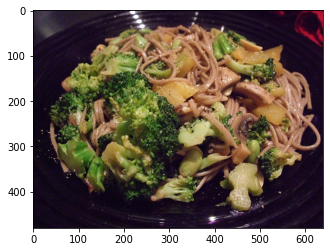

In [11]:
coco_food = CustomCoco(COCO_PATH, id_subset_json=FOOD_JSON)
analyse_data(coco_food)

